In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy
from scipy.optimize import curve_fit
import cv2
from PIL import Image
import glob

import images_library

In [ ]:
# Creo la roi 

In [ ]:
I=cv2.imread("Cherenkov_457_1.TIF")
total_row , total_col ,layers = I.shape

x,y = np.ogrid [: total_row , :total_col]
cen_x, cen_y= 243, 247 #vanno definiti in funzione della posizione della fibra scintillante
d= np.sqrt ((x-cen_x)**2 + (y-cen_y)**2)
r= 290 #va impostato

roi= d>r

I[roi]=100
#imarray=np.array(I)
#imdat=imarray[np.nonzero(I)]

fig, ax = plt.subplots(1,1)
ax.imshow(I)
#fig.imshow(I, vmin=0, vmax=4000)


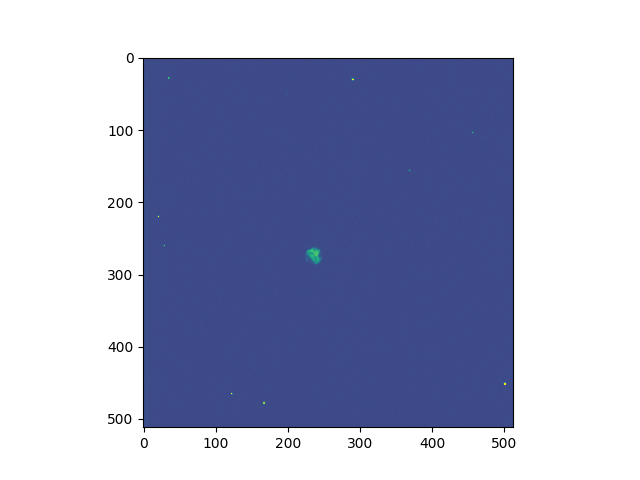

In [2]:
#Let's open with PIL
imArray=images_library.openImage('20221102_Flash/2022_11_03_flash_1mm/Cherenkov/Cherenkov_457_1.TIF')
images_library.plotImage(imArray)

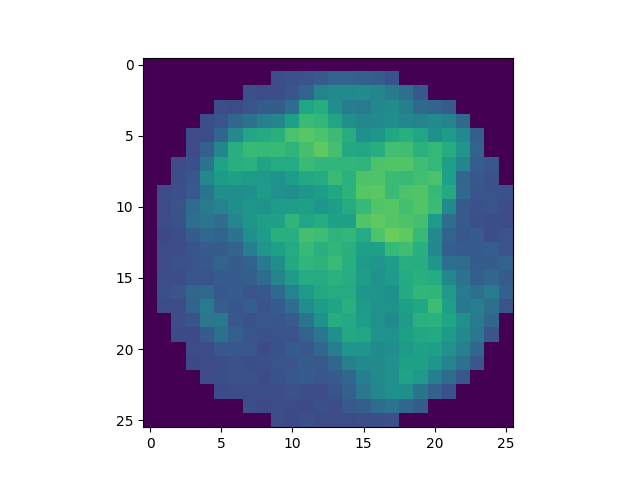

In [3]:
x, y = np.ogrid [:len(imArray[0]) , :len(imArray[1])]
cen_x, cen_y= 275, 235 #vanno definiti in funzione della posizione della fibra scintillante
r= 13 #va impostato

imArray, ROI=images_library.findROI(imArray, x, y, cen_x, cen_y, r )
images_library.plotImage(imArray[cen_x-r:cen_x+r, cen_y-r:cen_y+r])


In [ ]:
###Buio

In [4]:
darkFiles = glob.glob(f"20221102_Flash/2022_11_03_flash_1mm/Cherenkov/*buio*.TIF")
#20221102_Flash/2022_11_03_flash_1mm/Cherenkov
#20221102_Flash/2022_11_04_flash_1mm/cerenkov
darkDict={}
images_library.fillDict(darkDict, darkFiles, "buio")


Added an image to the dictionary with key: buio_457
Added an image to the dictionary with key: buio


In [5]:
cerenkovFiles = glob.glob(f"20221102_Flash/2022_11_03_flash_1mm/Cherenkov/Cherenkov*.TIF")
#20221102_Flash/2022_11_03_flash_1mm/Cherenkov
#20221102_Flash/2022_11_04_flash_1mm/cerenkov
cerOpen={}
cerFiltered={}

images_library.fillDict(cerOpen, cerenkovFiles, "open")
images_library.fillDict(cerFiltered, cerenkovFiles, "457")

Added an image to the dictionary with key: open_1
Added an image to the dictionary with key: open_2
Added an image to the dictionary with key: open_3
Added an image to the dictionary with key: 457_2
Added an image to the dictionary with key: 457_3
Added an image to the dictionary with key: 457_1


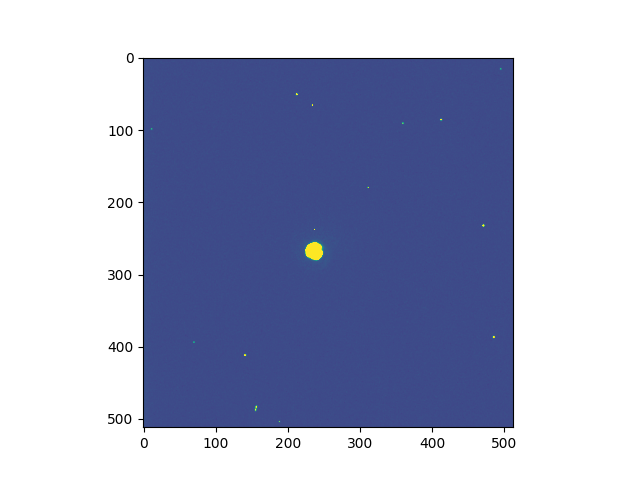

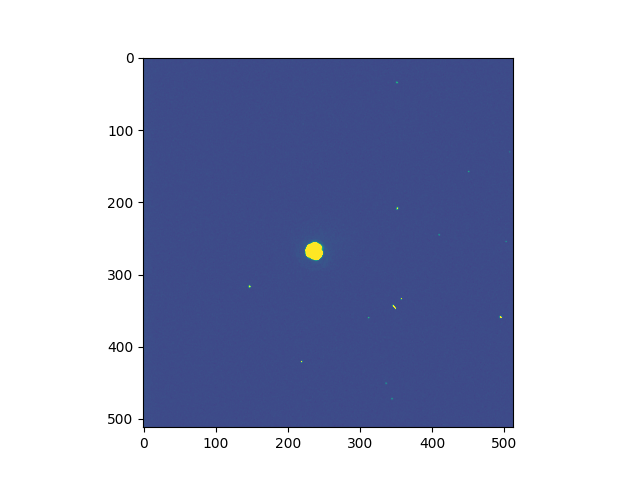

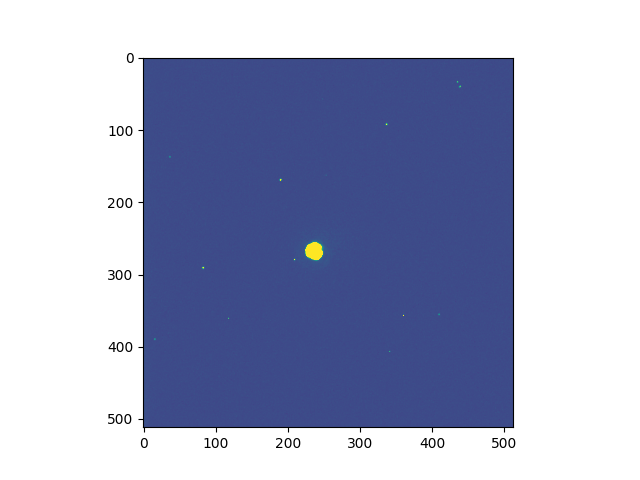

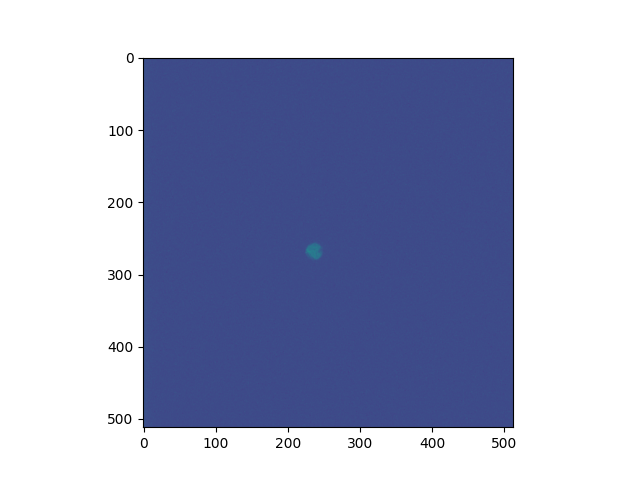

In [6]:
for key in cerOpen:
    images_library.plotImage(cerOpen[key])
images_library.plotImage(darkDict["buio"])

N of pixels with more events than background:  [514, 516, 513]
Light integral in the ROI:  [879332, 1074811, 876866]
Mean light in the ROI:  [1710.76264591 2082.96705426 1709.29044834]


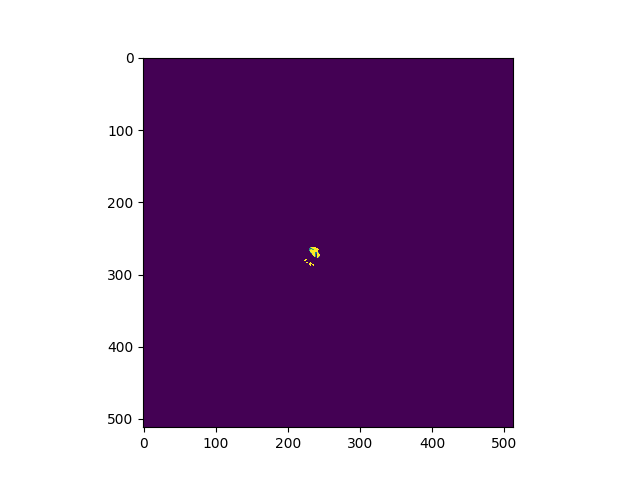

In [7]:
#OPEN
cerOpenDiff = images_library.diffImDark(cerOpen, darkDict["buio"])
lightIntegral=[]
nOfPixels=[]
for im in cerOpenDiff: 
    im[~ROI]=0
    lightIntegral.append(np.sum(im))    
    nOfPixels.append(len(np.argwhere(im!=0)))
    
cerOpenDiff[1]
images_library.plotImage(cerOpenDiff[1])
print("N of pixels with more events than background: ", nOfPixels)
print("Light integral in the ROI: ", lightIntegral)
mean = np.array(lightIntegral)/np.array(nOfPixels)
print("Mean light in the ROI: ", mean)

cerOpenMean = np.mean(mean)
cerOpenStdev = np.std(mean)

N of pixels with more events than background:  [509, 510, 513]
Light integral in the ROI:  [885036, 819322, 1016283]
Mean light in the ROI:  [1738.7740668  1606.51372549 1981.05847953]


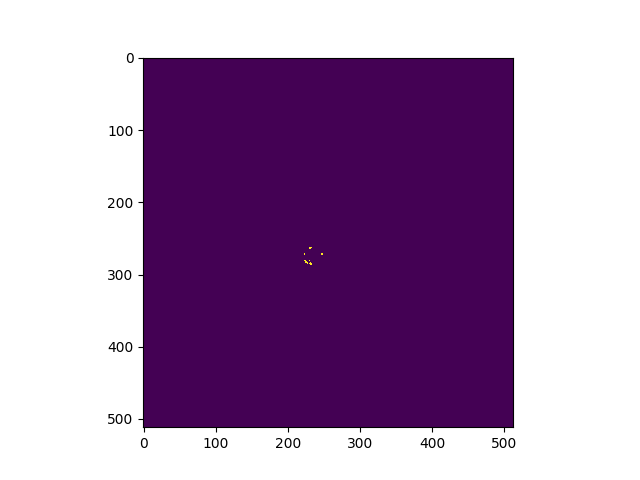

In [8]:
#FILTERED
cerFilteredDiff = images_library.diffImDark(cerFiltered, darkDict["buio_457"])
lightIntegral=[]
nOfPixels=[]
for im in cerFilteredDiff: 
    im[~ROI]=0
    lightIntegral.append(np.sum(im))    
    nOfPixels.append(len(np.argwhere(im!=0)))
    
images_library.plotImage(cerFilteredDiff[1])
print("N of pixels with more events than background: ", nOfPixels)
print("Light integral in the ROI: ", lightIntegral)
mean = np.array(lightIntegral)/np.array(nOfPixels)
print("Mean light in the ROI: ", mean)

cerFilteredMean = np.mean(mean)
cerFilteredStdev = np.std(mean)

In [9]:
print('OPEN case:\n Mean: %d, Stdev: %d' % (cerOpenMean, cerOpenStdev))
print('FILTERED case:\n Mean: %d, Stdev: %d' % (cerFilteredMean, cerFilteredStdev))


OPEN case:
 Mean: 1834, Stdev: 175
FILTERED case:
 Mean: 1775, Stdev: 155
